<a href="https://colab.research.google.com/github/wolfram-laube/IBM-Coursera-Advanced-Data-Science-Capstone/blob/master/modeling_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Bank Transactions using Deep Learning
## IBM Coursera Advanced Data Science Capstone - Model Building

## Wolfram Laube


In [2]:
# Preamble for using GitHub repo clone on Google Drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')
% cd gdrive/My Drive/Blauweiss/Entwicklung/vcs/github.com/wolfram-laube/

# For initial checkout, clone the GitHub repository
! git clone 'https://github.com/wolfram-laube/IBM-Coursera-Advanced-Data-Science-Capstone'

# For subsequent editing, merely pull the repo
% cd IBM-Coursera-Advanced-Data-Science-Capstone/
! git pull

# Install Git LFS for handling the H5 files
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.python.sh | bash
!sudo apt-get install git-lfs
!git lfs pull

# Change to working directory
#% cd week1

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive
/content/gdrive/My Drive/Blauweiss/Entwicklung/vcs/github.com/wolfram-laube
fatal: destination path 'IBM-Coursera-Advanced-Data-Science-Capstone' already exists and is not an empty directory.
/content/gdrive/My Drive/Blauweiss/Entwicklung/vcs/github.com/wolfram-laube/IBM-Coursera-Advanced-Data-Science-Capstone
Already up to date.
Checking for curl...
Detected curl...
Detected VirtualEnv: Please visit https://packagecloud.io/github/git-lfs/install#virtualenv
pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
No pip.conf found, creating
The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk spac

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [3]:
import tensorflow as tf
import keras as keras
from keras import backend as K

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 16 2019

@author: Wolfram Laube
@licence:Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
"""

import pandas as pd
import numpy as np
import sys
import os
import re
import matplotlib.pyplot as plt 
from datetime import date
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
print('TensorFlow Version: ', tf.__version__)

#from DocumentClassifierV1 import * # Custom library created for the Capstone project.

TensorFlow Version:  2.4.1


In [5]:
import PIL
from PIL import Image as PImage, ImageDraw, ImageEnhance, ImageFilter, ImageChops, ImageOps
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# create a data generator
datagen = ImageDataGenerator()
# load and iterate training dataset
train_it = datagen.flow_from_directory('data/', class_mode='categorical', batch_size=64)
# load and iterate validation dataset
val_it = datagen.flow_from_directory('data/', class_mode='categorical', batch_size=64)
# load and iterate test dataset
test_it = datagen.flow_from_directory('data/', class_mode='categorical', batch_size=64)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3))) #, strides=(2, 2)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(40, activation='softmax'))

print(model.summary())

epochs=50
optimizer=keras.optimizers.Adadelta()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# fit model
hist = model.fit(train_it, epochs=epochs, steps_per_epoch=16, validation_data=val_it, validation_steps=8)
# evaluate model
#loss = model.evaluate(test_it, steps=24)
# make a prediction
#yhat = model.predict(predict_it, steps=24)



Found 1322 images belonging to 40 classes.
Found 1322 images belonging to 40 classes.
Found 1322 images belonging to 40 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      1849

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
16/16 [==============================] - 403s 24s/step - loss: 83.8187 - accuracy: 0.0224 - val_loss: 9.2179 - val_accuracy: 0.0508
Epoch 2/50
16/16 [==============================] - 372s 23s/step - loss: 31.0477 - accuracy: 0.0381 - val_loss: 3.8443 - val_accuracy: 0.0137
Epoch 3/50
16/16 [==============================] - 371s 23s/step - loss: 12.2486 - accuracy: 0.0352 - val_loss: 3.6888 - val_accuracy: 0.2930
Epoch 4/50
16/16 [==============================] - 361s 23s/step - loss: 6.7562 - accuracy: 0.0816 - val_loss: 3.6887 - val_accuracy: 0.3066
Epoch 5/50
16/16 [==============================] - 367s 23s/step - loss: 5.2412 - accuracy: 0.1583 - val_loss: 3.6887 - val_accuracy: 0.2871
Epoch 6/50
16/16 [==============================] - 363s 23s/step - loss: 4.6770 - accuracy: 0.1662 - val_loss: 3.6886 - val_accuracy: 0.3281
Epoch 7/50
16/16 [==============================] - 370s 23s/step - loss: 4.0899 - accuracy: 0.2136 - val_loss: 3.6885 - val_accuracy: 0.3066
Epo

Text(0.5, 0, 'Epocs')

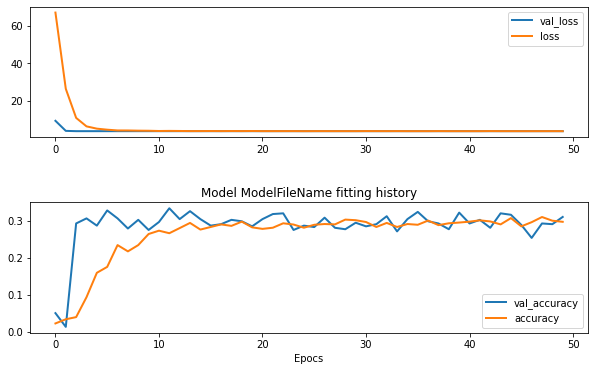

In [6]:
ModelHistory = pd.DataFrame(data = hist.history)
# Plot model history and save           
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.subplots_adjust(hspace=0.5)
ModelHistory[['val_loss', 'loss']].plot(linewidth=2, figsize=(10, 6), ax=axes[0])
ModelHistory[['val_accuracy', 'accuracy']].plot(linewidth=2, figsize=(10, 6),ax=axes[1])
plt.title('Model {} fitting history'.format("ModelFileName"))
plt.xlabel('Epocs')

## 1. Read Pre-saved Input dataset

In [ ]:
DocumentFilesData  = pd.read_pickle('Data/DocumentClassification_IBM_ADV_DS_Capstone_TrainSample_128x128_20190316.pkl')

FileNotFoundError: ignored

In [ ]:
ClassLabels = list(DocumentFilesData.FileClass.unique()) 

NameError: ignored

In [ ]:
ClassNumbers = list(range(len(ClassLabels)))

In [ ]:
ClassLabelMap = list((zip(ClassLabels, ClassNumbers)))
print(ClassLabelMap)

In [ ]:
for clm in ClassLabelMap:
    DocumentFilesData.loc[DocumentFilesData['FileClass']==clm[0] , 'ClassNumber'] = clm[1]

In [ ]:
NClasses = len(ClassLabels)
imgRows = 128
imgCols = 128  

In [ ]:
##################
##################
##################



## 2. Pre-Process Modeling Dataset

In [ ]:
#TestSize= 0.3
#ResponseColumn='ClassNumber'

#TrainData, TestData = train_test_split(DocumentFilesData, test_size=TestSize, random_state=42)
#x_train = TrainData['DocumentMatrix'].values
#x_train = np.asarray(list(x_train), dtype ='int')
#y_train = TrainData[ResponseColumn].values
#x_test = TestData['DocumentMatrix'].values
#x_test = np.asarray(list(x_test), dtype ='int')
#y_test = TestData[ResponseColumn].values        

In [ ]:
TestSize= 0.3
ResponseColumn='ClassNumber'

TrainData, TestData = train_test_split(Images, test_size=TestSize, random_state=42)
x_train = TrainData['DocumentMatrix'].values
x_train = np.asarray(list(x_train), dtype ='int')
x_test = TestData['DocumentMatrix'].values
x_test = np.asarray(list(x_test), dtype ='int')

y_test = TestData[ResponseColumn].values
y_train = TrainData[ResponseColumn].values

ValueError: ignored

In [ ]:
#Modeling parameters    
NClasses = len(ClassLabels)

#Shape of datasets
print(x_train.shape)
print(y_train.shape)

(11379, 128, 128)
(11379,)


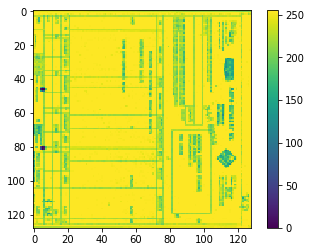

In [ ]:
#Plot sample image with scale
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, imgRows, imgCols)
    x_test = x_test.reshape(x_test.shape[0], 1, imgRows, imgCols)
    input_shape = (1, imgRows, imgCols)
else:
    x_train = x_train.reshape(x_train.shape[0], imgRows, imgCols, 1)
    x_test = x_test.reshape(x_test.shape[0], imgRows, imgCols, 1)
    input_shape = (imgRows, imgCols, 1)

In [ ]:
x_train = x_train.astype('float32') #convert interger image tensor to float
x_test = x_test.astype('float32') #convert interger image tensor to float
x_train = x_train/255 # Normalize grayscale to a number between 0 and 1
x_test = x_test/255 # Normalize grayscale to a number between 0 and 1
# convert class vectors to binary class matrices (One-hot encoding)
y_train = keras.utils.to_categorical(y_train, NClasses) 
y_test = keras.utils.to_categorical(y_test, NClasses)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11379 train samples
4877 test samples


## 3. Setup CNN Model

In [ ]:
ModelID='DocumentClassification_IBM_ADV_DS_Capstone'
ModelVersion = 'CNN_V03' # 'LGR_V01' #    'DFF_V01' #    'CNN_V01' #   'CNN_V02' # 
batch_size = 64 # 128 was used in GPU development environment (delivered model)
epochs = 10 # 40 was used in GPU development environment (delivered model)
optimizer=keras.optimizers.Adadelta()
BuiltDate= '20190316' #date.today().strftime('%Y%m%d')
ModelFileName = '{}_{}_{}x{}_{}'.format(ModelID, ModelVersion, imgRows, imgCols, BuiltDate)
print('Building Model {}'.format(ModelFileName))

Building Model DocumentClassification_IBM_ADV_DS_Capstone_CNN_V03_128x128_20190316


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #, strides=(2, 2)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(NClasses, activation='softmax')) # Output layer

### model summary

In [ ]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
__________

### Compile model 

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])


## 4. Fit Model

In [ ]:
# Create Tensorflow Session
sess = tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=16, inter_op_parallelism_threads=16))
keras.backend.set_session(sess)

# Fit model
hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))


Train on 11379 samples, validate on 4877 samples
Epoch 1/10
11379/11379 [==============================] - 439s 39ms/step - loss: 1.6115 - acc: 0.2876 - val_loss: 1.4241 - val_acc: 0.4515
Epoch 2/10
11379/11379 [==============================] - 437s 38ms/step - loss: 1.2580 - acc: 0.5218 - val_loss: 0.8318 - val_acc: 0.6974
Epoch 3/10
11379/11379 [==============================] - 437s 38ms/step - loss: 0.8642 - acc: 0.6994 - val_loss: 0.6825 - val_acc: 0.7591
Epoch 4/10
11379/11379 [==============================] - 435s 38ms/step - loss: 0.6632 - acc: 0.7734 - val_loss: 0.6424 - val_acc: 0.7792
Epoch 5/10
11379/11379 [==============================] - 435s 38ms/step - loss: 0.5100 - acc: 0.8322 - val_loss: 0.5027 - val_acc: 0.8321
Epoch 6/10
11379/11379 [==============================] - 435s 38ms/step - loss: 0.4004 - acc: 0.8677 - val_loss: 0.4374 - val_acc: 0.8651
Epoch 7/10
11379/11379 [==============================] - 434s 38ms/step - loss: 0.3295 - acc: 0.8945 - val_loss: 0.4

Text(0.5, 0, 'Epocs')

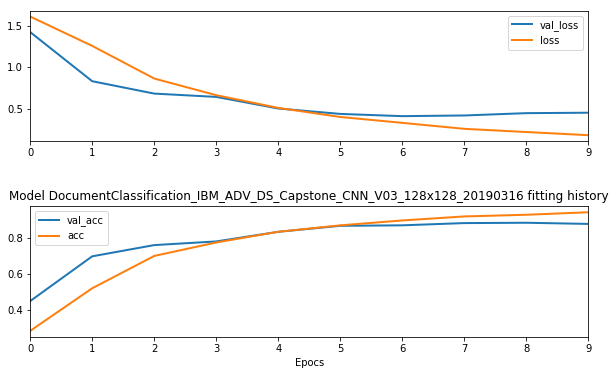

In [ ]:
ModelHistory = pd.DataFrame(data = hist.history)
# Plot model history and save           
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.subplots_adjust(hspace=0.5)
ModelHistory[['val_loss', 'loss']].plot(linewidth=2, figsize=(10, 6), ax=axes[0])
ModelHistory[['val_acc', 'acc']].plot(linewidth=2, figsize=(10, 6),ax=axes[1])
plt.title('Model {} fitting history'.format(ModelFileName))
plt.xlabel('Epocs')

## 5. Analyze model fitting History and Evaluate Performance

In [ ]:
# Print model fitting summury 
score = model.evaluate(x_test, y_test, verbose=0)    
print(ModelFileName)
print(model.summary())
print('train samples:', x_train.shape[0])
print('test samples:', x_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

DocumentClassification_IBM_ADV_DS_Capstone_CNN_V03_128x128_20190316
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
max_pool

## 6. Save Model

In [ ]:
model.save('{}.h5'.format(ModelFileName))
print('TF Model {}.h5 is saved...'.format(ModelFileName))

TF Model DocumentClassification_IBM_ADV_DS_Capstone_CNN_V03_128x128_20190316.h5 is saved...


## 7. Test saved model

In [ ]:
ModelLoaded = keras.models.load_model('{}.h5'.format(ModelFileName))     
predictions_test = ModelLoaded.predict(x_test)    

N  =len(predictions_test)
PredictedClassNumbers = [None] * N
PredictedClassConfidence = [None] * N
ActualClassNumbers = [None] * N

for i in range(N):
    p = np.argmax(predictions_test[i])
    PredictedClassNumbers[i] = p
    PredictedClassConfidence[i] = predictions_test[i][p]  

for i in range(N):
    p = np.argmax(y_test[i])
    ActualClassNumbers[i] = p

TestResults = pd.DataFrame(data = predictions_test)
TestResults['PredictedClassNumber'] = PredictedClassNumbers
TestResults['ActualClassNumber'] = ActualClassNumbers

### Print model fitting summary and performance

In [ ]:
print(ModelFileName)
print('train samples:', x_train.shape[0])
print('test samples:', x_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])    
print(pd.crosstab(TestResults['ActualClassNumber'], TestResults['PredictedClassNumber'],  margins=True))   

DocumentClassification_IBM_ADV_DS_Capstone_CNN_V03_128x128_20190316
train samples: 11379
test samples: 4877
Test loss: 0.45174278787885114
Test accuracy: 0.8755382407584199
PredictedClassNumber    0    1    2    3    4    5   All
ActualClassNumber                                       
0                     720   14   30    6    4    7   781
1                       9  727   47   12    0    0   795
2                      34   41  717   39   10    6   847
3                       9   26   61  761   16   13   886
4                       0    7   31   57  696   16   807
5                      25    3   47   24   13  649   761
All                   797  818  933  899  739  691  4877


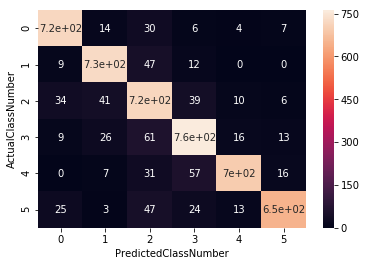

In [ ]:
import seaborn as sns
sns.heatmap(pd.crosstab(TestResults.ActualClassNumber, TestResults.PredictedClassNumber, margins=False), annot=True)

<hr>
<p> This notebook and related materials were developed by <b> Sumudu Tennakoon</b> for the capstone project in partial fulfillment of the requirements for the <b> Advanced Data Science with IBM Specialization</b>. <br>
March 2019. <br>
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)</p>